7-) Pesquise e apresente um estudo sobre redes neurais recorrentes LSTM. Apresente neste
estudo aplicações das LSTM deep learning no Processamento de Linguagem Natural


Referencias

https://www.analyticsvidhya.com/blog/2021/06/natural-language-processing-sentiment-analysis-using-lstm/

https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews

## **Etapa 1**: Importação das Bibliotecas Necessárias

In [12]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
from keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## **Etapa 2**: Carregando o dataset e criação de uma nova coluna 'sentiment' (sentimento) com base na 'rating' (classficação)

In [13]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("sid321axn/amazon-alexa-reviews")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sid321axn/amazon-alexa-reviews/versions/3


In [14]:
file_path = os.path.join(path, 'amazon_alexa.tsv')
data = pd.read_csv(file_path, sep='\t')
print(data.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


loading the dataset and creating a new column 'sentiment' based on 'rating'

In [15]:
# Creating a new column sentiment based on overall ratings
def sentiments(df):
  if df['rating'] > 3.0:
    return 'Positive'
  elif df['rating'] <= 3.0:
    return 'Negative'
data['sentiment'] = data.apply(sentiments, axis=1)

## **Etapa 3**: Verificar valores nulos no conjunto de dados.

In [16]:
# Check if there are any null values
data_v1 = data[['verified_reviews', 'sentiment']]
data_v1.isnull().sum()

,0
verified_reviews,1
sentiment,0


## **Etapa 4**: Limpeza dos dados. Inclui a remoção de caracteres especiais, dígitos, símbolos desnecessários e stop words. Além disso, é necessário converter as palavras para sua forma raiz para fácil interpretação.

In [17]:
nltk.download('wordnet')

def cleaning(df, stop_words):

  df.loc[:,'verified_reviews'] = df['verified_reviews'].astype(str)
  df.loc[:,'verified_reviews'] = df['verified_reviews'].apply(lambda x:
                        ' '.join(x.lower() for x in x.split()))
# Replacing the special characters
  df.loc[:,'verified_reviews'] = df['verified_reviews'].str.replace('[^ws]','')

  df.loc[:,'verified_reviews'] = df['verified_reviews'].str.replace('d','')

  df.loc[:,'verified_reviews'] = df['verified_reviews'].apply(lambda x:
                        ' '.join(x for x in x.split() if x not in stop_words))
  df.loc[:,'verified_reviews'] = df['verified_reviews'].apply(lambda x:
                          ' '.join([Word(x).lemmatize() for x in x.split()]))
  return df
nltk.download('stopwords')
stop_words = stopwords.words('english')
data_v1 = cleaning(data_v1, stop_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Etapa 5**: Visualizar as palavras comuns nas avaliações. O tamanho de cada palavra representa sua frequência de ocorrência nos dados.

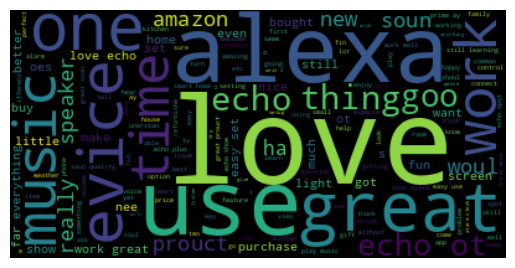

In [18]:
common_words =''

for i in data_v1.verified_reviews:
  i = str(i)
  tokens = i.split()
  common_words += " ".join(tokens)+" "

wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## **Etapa 6**: Codificação da variável de destino usando o ‘Label Encoder’ da biblioteca ‘sklearn’.

In [19]:
lb = LabelEncoder()
data_v1.loc[:,'sentiment'] = lb.fit_transform(data_v1['sentiment'])

## **Etapa 7**: Tokenizar e converter as avaliações em vetores numéricos.


`Num_words` – Este hiperparâmetro se refere ao número de palavras a serem mantidas com base na frequência das palavras.

`Split` – Este hiperparâmetro se refere ao separador usado para dividir a palavra.

A função **`pad_sequence()`** é usada para converter uma lista de sequências em um array NumPy 2D.

In [20]:
data['verified_reviews'] = data['verified_reviews'].astype(str)
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(data_v1['verified_reviews'].values)
X = tokenizer.texts_to_sequences(data['verified_reviews'].values)
X = pad_sequences(X)

## **Etapa 8**: Construindo o modelo LSTM usando a biblioteca ‘Keras’. Esta etapa envolve a inicialização do modelo, adicionando as camadas LSTM necessárias e a compilação do modelo

In [22]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

## **Etapa 9**: Dividir os dados em dados de treinamento e teste.

In [23]:
y = pd.get_dummies(data_v1['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## **Etapa 10**: Treinar o modelo usando dados de treinamento.

In [24]:
batch_size = 32
model.fit(X_train, y_train, epochs=5, batch_size=batch_size, verbose='auto')

Epoch 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 55s 753ms/step - accuracy: 0.8608 - loss: 0.4561
Epoch 2/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 82s 756ms/step - accuracy: 0.8798 - loss: 0.3302
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 83s 767ms/step - accuracy: 0.9124 - loss: 0.2311
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 82s 768ms/step - accuracy: 0.9284 - loss: 0.1949
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 81s 759ms/step - accuracy: 0.9289 - loss: 0.1930


## **Etapa 11**: Avaliação do modelo

In [25]:
model.evaluate(X_test,y_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 247ms/step - accuracy: 0.8848 - loss: 0.2520


[0.25324568152427673, 0.8878306746482849]

## **Conclusão**

Concluímos que construção do nosso modelo LSTM para classificar os sentimentos para avaliações de produtos Alexa da Amazon em categorias "positivas" e "negativas". A precisão do modelo é de 88,8%. Podemos ajustar ainda mais os hiperparâmetros para melhorar o desempenho do modelo.